# Building a Logistic Regression

Create a logistic regression based on the bank data provided. 

The data is based on the marketing campaign efforts of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).

Note that the first column of the dataset is the index.

Source: [Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014


## Import the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

## Load the data

Load the ‘Example_bank_data.csv’ dataset.

In [11]:
raw_data = pd.read_csv('Example-bank-data.csv')
raw_data

,Unnamed: 0,duration,y
0,0,117,no
1,1,274,yes
2,2,167,no
3,3,686,yes
4,4,157,no
5,5,126,no
6,6,84,no
7,7,17,no
8,8,704,yes
9,9,185,no


We want to know whether the bank marketing strategy was successful, so we need to transform the outcome variable into 0s and 1s in order to perform a logistic regression.

In [12]:
data = raw_data.copy()
data['y'] = data['y'].map({'yes' : 1,'no' : 0})
data

,Unnamed: 0,duration,y
0,0,117,0
1,1,274,1
2,2,167,0
3,3,686,1
4,4,157,0
5,5,126,0
6,6,84,0
7,7,17,0
8,8,704,1
9,9,185,0


### Declare the dependent and independent variables

In [14]:
y = data['y']
x1 = data['duration']

### Simple Logistic Regression

Run the regression and visualize it on a scatter plot (no need to plot the line).

In [16]:
x = sm.add_constant(x1)
reg_log = sm.Logit(y,x)
result_log = reg_log.fit()

Optimization terminated successfully.
         Current function value: 0.546118
         Iterations 7


In [18]:
result_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  518
Model:                          Logit   Df Residuals:                      516
Method:                           MLE   Df Model:                            1
Date:                Tue, 26 Mar 2019   Pseudo R-squ.:                  0.2121
Time:                        06:49:15   Log-Likelihood:                -282.89
converged:                       True   LL-Null:                       -359.05
                                        LLR p-value:                 5.387e-35
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7001      0.192     -8.863      0.000      -2.076      -1.324
duration       0.0051      0.001      9.159      0.000       0.004       0.006
==============================================================================
"""

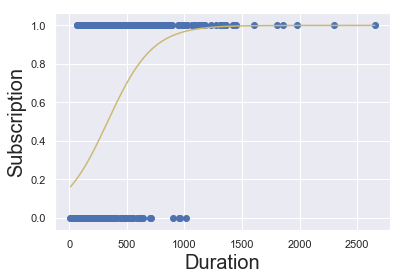

In [21]:
def f(x,b0,b1):
    return np.array(np.exp(b0+x*b1)) / (1 + np.exp(b0 + x*b1))

f_sorted = np.sort(f(x1,result_log.params[0],result_log.params[1]))
x_sorted = np.sort(np.array(x1))

plt.scatter(x1,y,color = 'C0')
plt.xlabel('Duration',fontsize = 20)
plt.ylabel('Subscription',fontsize = 20)
plt.plot(x_sorted,f_sorted,color = 'C8')
plt.show()